# NSF Research Awards Abstracts

Sergio Nieto

_Topic Modeling Analysis for awarded paper abstracts by the National Science Foundation [NSF](https://new.nsf.gov/about) in the year 2020._

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/qSergio/MapperTopic/blob/main/Report/TextAnalysis.ipynb)

## Initial Objectives

1. What are the possible topics?
2. Build a unsupervised model to classify paper abstracts using the topics found.

## Data-Business Understanding

Taking introductory information from NSF site and related sources:

* One concern for researches and non-profit organizations is to get funding to continue working on a specific area.
* There are several options to obtain funding and organizations rarely depend on just one source, government grants provide one of the best alternatives to finance research and specially projects with a socio-economic or positive impact.

__Data Source:__ [National Science Foundation Awards](https://www.nsf.gov/awardsearch/download?DownloadFileName=2020&All=true)

### Business Opportunity

Equity firms and Venture inverstors are always looking for opportunities and novel areas to invest. A possible source of information to kickoff investment research are the relevant topics in this dataset. Award amounts may become an indicator of possible topics that may be worth consider for private funding.

### Findings

We have the following insights after analysis and data exploration:

1. The Topics with higher _average funding per research group_ are related to Condesed Matter Physics and New Material Design (New Structures, Topological phase transitions, etc.)

2. Business related funding: image processing and nanotechnology in healthcare applications, also biologucal applications around cell dynamics and genomics.
   
3. In general, NSF funding goes to socio-economical and positive impact reasearch because of the number of research papers submitted and awarded: 2167 awarded papers. But average amount awarded by research shows a different trend.

#### **TOPICS & FUNDING (in Millions usd):**

| CLUSTER TOPICS | #MEMBERS | FUNDING AVERAGE AMOUNT | TOTAL FUNDING
|---|---|---|---|
| matt phasis condense quantum connection property class aim topology theory | 12 | 2.1 | 25.8 |
|plasma scale study experiment earth simulation environment result structure model|	30 | 1.9| 56.2|
|time video term interview challenge interaction way effort examine state |	2.0	| 1.4|	2.9|
|image resolution scatter arise algorithm mathematics lead technology study measurement|	39|	1.3|	50.2|
|star galaxy model approach cluster growth prediction formation size activity|	90	|1.3	|112.4|
|nanotechnology college region access researcher development opportunity community infrastructure activity|	33	|1.1	|37.1|
|material quantum community team outreach chemistry description field center workforce	|158	|1.02	|161.8|
|quark proton measurement gluon scatter state energy distribution particle correlation	|43	|0.95	|40.9|
|image software disease technique time base development propose learn need	|36	|0.88	|31.6|

## Strategy

>1. Pre-process data using tokenization, cleaning and lemmatization, this step uses Part Of Speech (POS) tagging.
>2. Generate a vector representation of the lemmatized text observations using an embedding model.
>3. Use an Unsupervised Learning algorithm to cluster text data vectors to ensure similarity between members of the group.
>4. Extract Topics for each cluster.
>

The resulting strategy may be optimized using different algorithms and a different approach to Topic extraction.

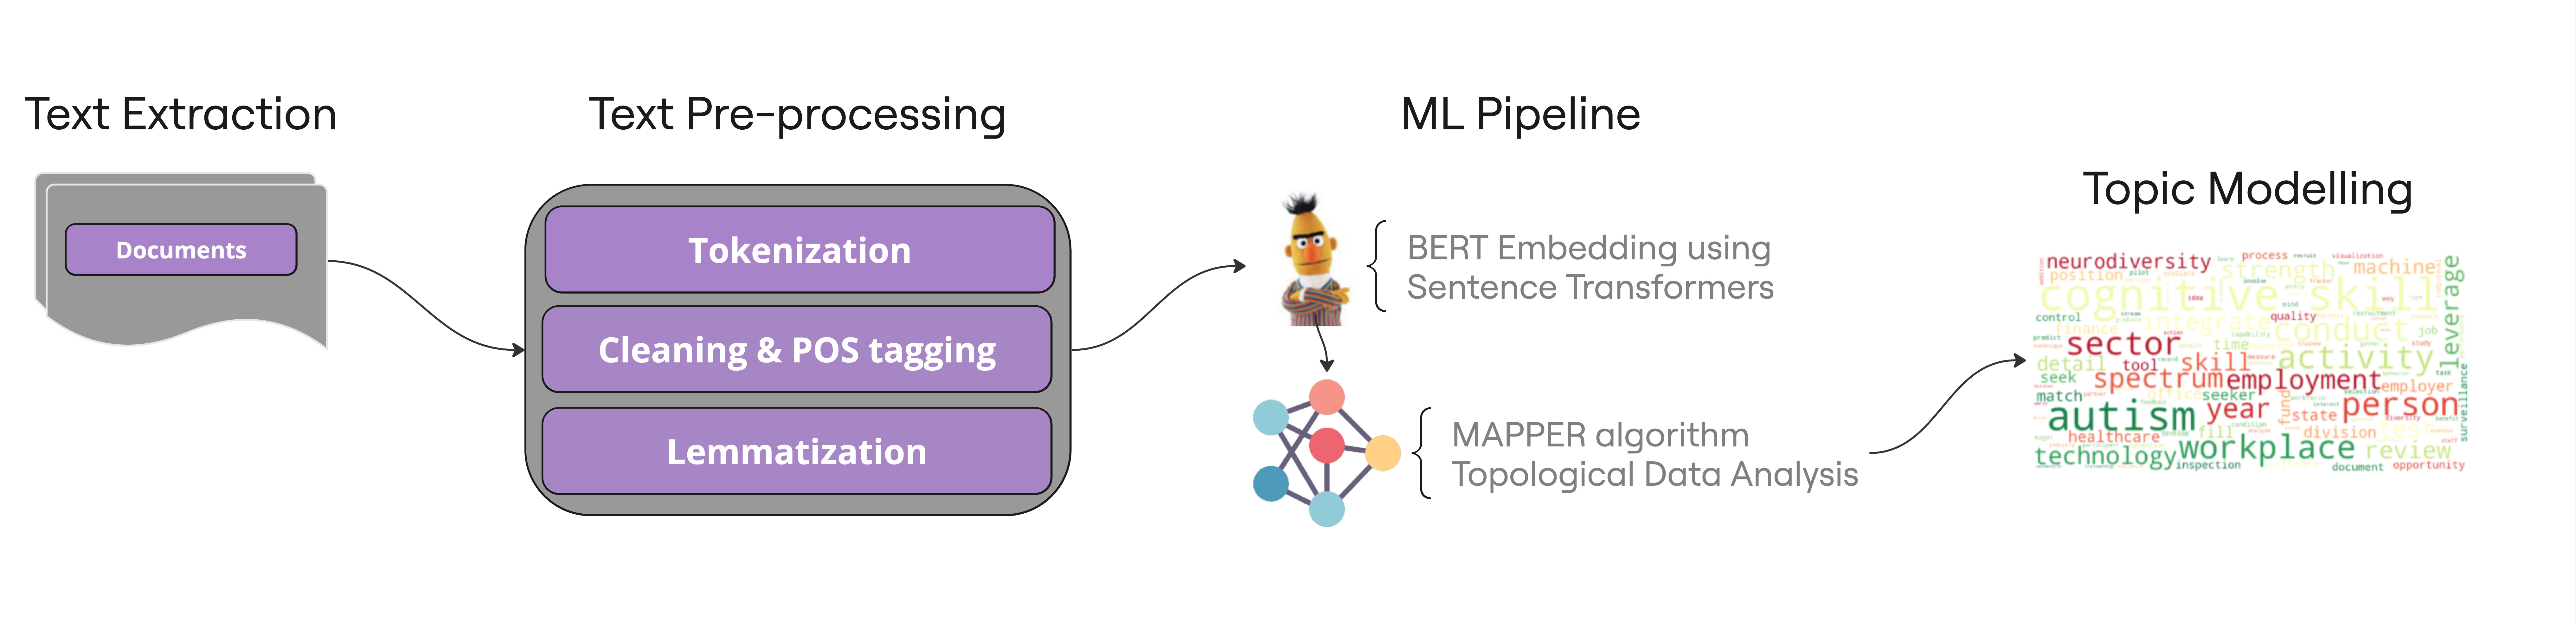

In [1]:
from IPython.display import Image
Image(filename='frame.jpg')

### Topological Data Analysis

For the Unsupervised Phase I will use Topological Data analysys (TDA). 

TDA is a collection of powerful tools that can quantify shape and structure in data in order to answer questions from the data’s domain. This is done by representing some aspect of the structure of the data in a simplified topological signature.

Many tools belong to this set of algorithms, some well-known examples are:

1. T-SNE
2. UMAP
3. MAPPER or Reeb graphs.
4. Persistent Homology and Cohomology

For this case study MAPPER will be used to cluster text vector representations and to obtan and extract the relevant topics.

__MAPPER__ is an algoritm that helps to map a dataset ${\cal D}$ into a graph ${\cal G}$, in such a way that certain Topology is preserved during the process. In general, Mapper is a combination of dimensionality reduction, clustering and graph networks techniques used to get higher level understanding of the structure of data. It is mainly used for: 

* visualising the shape of data through a particular lens
* detecting clusters and interesting topological structures which traditional methods fail to find 
* selecting features that best discriminate data and for model interpretability

It is one of the most famous algorithms in TDA and also the more successful one: 

> Li L, Cheng WY, Glicksberg BS, Gottesman O, Tamler R, Chen R, Bottinger EP, Dudley JT. _Identification of type 2 diabetes subgroups through topological analysis of patient similarity._ Sci Transl Med. 2015 Oct 28;7(311):311ra174. doi: 10.1126/scitranslmed.aaa9364. PMID: 26511511; PMCID: PMC4780757. [link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4780757/)
> 
> Nicolau M, Levine AJ, Carlsson G. _Topology based data analysis identifies a subgroup of breast cancers with a unique mutational profile and excellent survival._ Proc Natl Acad Sci U S A. 2011 Apr 26;108(17):7265-70. doi: 10.1073/pnas.1102826108. Epub 2011 Apr 11. PMID: 21482760; PMCID: PMC3084136. [link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3084136/)

## Initial EDA

In [2]:
# Working libraries
import os 
import glob
import pandas as pd
import numpy as np
from tqdm import tqdm

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

# Text pre-processing
import re, nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
from gensim.models import Word2Vec

# NLP
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# Deep Learning Transformers
from sentence_transformers import SentenceTransformer
from sentence_transformers import util

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
np.random.seed(2024)

In [3]:
pd.set_option('max_colwidth', None)
pd.set_option('display.max_columns', None)

In [4]:
import en_core_web_sm
path_encore = str(en_core_web_sm.__file__)
print(path_encore)

/opt/conda/lib/python3.11/site-packages/en_core_web_sm/__init__.py


In [5]:
# Cuantos hay

!ls ./2020/ | wc -l

13300


In [6]:
# Example

pd.read_xml('./2020/2000005.xml').columns
# ImportError: lxml not found, please install or use the etree parser.

Index(['AwardTitle', 'AGENCY', 'AwardEffectiveDate', 'AwardExpirationDate',
       'AwardTotalIntnAmount', 'AwardAmount', 'AwardInstrument',
       'Organization', 'ProgramOfficer', 'AbstractNarration',
       'MinAmdLetterDate', 'MaxAmdLetterDate', 'ARRAAmount', 'TRAN_TYPE',
       'CFDA_NUM', 'NSF_PAR_USE_FLAG', 'FUND_AGCY_CODE', 'AWDG_AGCY_CODE',
       'AwardID', 'Investigator', 'Institution', 'Performance_Institution',
       'ProgramElement', 'ProgramReference', 'Appropriation', 'Fund',
       'FUND_OBLG'],
      dtype='object')

In [7]:
# use glob to get all the xml files  
# in the folder 
path = os.getcwd()
xml_files = glob.glob(os.path.join(path+'/2020', "*.xml"))

In [8]:
len(xml_files)

13300

In [9]:
# need the folder name to print errors
xml_files[1].split("/")[-1].replace('.xml','')

'2000009'

In [10]:
xml_list = []
for xml_file in xml_files:
    try:
        xml_data = pd.read_xml(xml_file)
        xml_list.append(xml_data)
    except Exception as e:
        print(e)
        print('File with error {}, possible invalid format'.format(xml_file.split("/")[-1].replace('.xml','')))
        continue  # possible invalid format

df = pd.concat(xml_list)
df.reset_index(drop=True, inplace=True)

### Explore the files

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13300 entries, 0 to 13299
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AwardTitle               13300 non-null  object 
 1   AGENCY                   13300 non-null  object 
 2   AwardEffectiveDate       13300 non-null  object 
 3   AwardExpirationDate      13300 non-null  object 
 4   AwardTotalIntnAmount     13300 non-null  float64
 5   AwardAmount              13300 non-null  int64  
 6   AwardInstrument          0 non-null      float64
 7   Organization             0 non-null      float64
 8   ProgramOfficer           0 non-null      float64
 9   AbstractNarration        13159 non-null  object 
 10  MinAmdLetterDate         13300 non-null  object 
 11  MaxAmdLetterDate         13300 non-null  object 
 12  ARRAAmount               0 non-null      float64
 13  TRAN_TYPE                13300 non-null  object 
 14  CFDA_NUM              

In [12]:
df[['AbstractNarration', 'AwardAmount', 'AwardTitle']].sample()

,AbstractNarration,AwardAmount,AwardTitle
12385,"Many bottom-dwelling marine species have larvae whose behavior in the water column impacts dispersal and adult distributions. Snail larvae swim up with more effort or sink in response to cues from waves and turbulence, and it remains unclear whether larvae can use these physical cues for retention within or navigation among habitats. Larvae that swim up under waves may be retained over the continental shelf by wave-induced shoreward drift in surface waters. However, ocean warming causes larvae to be released earlier in spring when waves are larger and coastal upwelling is weaker, potentially carrying larvae into shallower waters that exceed the adults' temperature tolerance. The investigators will use a physical model of the Middle Atlantic Bight and adjacent estuaries to test hypotheses about how waves and turbulence affect transport patterns, retention near adult habitats, and climate-induced shifts in adult distributions. The project will produce simulations of ocean circulation and larval tracking codes that include waves both as behavior cues and as a transport mechanism; these products will be made publicly available. A graduate student will do a related dissertation. Undergraduate students will be involved through an NSF-funded REU program, the Aresty Program, which engages Rutgers' diverse undergraduates in research to boost retention in STEM majors, the Rutgers Research in Science and Engineering program, which targets underrepresented minorities, and the Skidmore Summer Research program. Model outputs will be used to develop learning materials for undergraduates, packaged as a case study for distribution through the National Center for Case Study Teaching in Science. Research results will also be presented to adult (55 and over) learners through the Skidmore Encore lecture series.&lt;br/&gt;&lt;br/&gt;Waves are unique in providing planktonic larvae with a behavior cue directly tied to a horizontal transport mechanism, and newly discovered larval responses to waves could have counter-intuitive impacts on larval transport and species distributions. Wave climates differ in the adjacent habitats of two congeneric snails: Tritia obsoleta occupies turbulent inlets and estuaries where waves are small, while Tritia trivittata occupies the continental shelf where waves are much larger. These two species' larvae sense waves and turbulence separately as acceleration and vorticity-induced body rotation, respectively. Late-stage estuarine larvae mainly exhibit turbulence-induced sinking that could reduce transport out of inlets and estuaries, whereas shelf larvae also exhibit wave-induced upward swimming that could aid retention over the shelf via Stokes drift. Since the 1960s, the shelf species' range has shifted into warmer water, opposite to predictions based on thermal tolerance. This shift may be driven by wave-induced larval transport; as ocean warming induces earlier spawning, larvae will encounter larger waves and weaker upwelling in spring, intensifying Stokes drift and onshore transport toward warmer, shallower waters of the inner shelf. The project will use numerical models to test hypotheses linking flow-induced larval behaviors to transport pathways, local retention, and climate-driven range shifts. Waves will be included as a source of both behavior cues and advection through acceleration and Stokes drift, respectively. Results will help resolve uncertainties about how Stokes drift, Eulerian return flow, and upwelling interact to transport larvae. Numerical experiments will describe how climate-driven changes in spawning phenology affect larval transport, potentially identifying the mechanism behind perplexing range shifts of shelf species into warmer water.&lt;br/&gt;&lt;br/&gt;This award reflects NSF's statutory mission and has been deemed worthy of support through evaluation using the Foundation's intellectual merit and broader impacts review criteria.",15178,Colla

In [13]:
df.dropna(subset = ['AbstractNarration'], inplace=True)
df.drop_duplicates(subset=['AbstractNarration'], inplace=True)

In [14]:
df.reset_index(drop=True, inplace=True)

In [15]:
df.shape

(11137, 28)

In [16]:
pd.DataFrame(df['AwardTitle'].value_counts()).head()

,AwardTitle
NSF Postdoctoral Fellowship in Biology FY 2020,53
PostDoctoral Research Fellowship,41
Collaborative Research: Moving Beyond the Margins: Modeling Water Availability and Habitable Terrestrial Ecosystems in the Polar Desert of the McMurdo Dry Valleys,3
COLLABORATIVE RESEARCH: Feeling the Squeeze: How Financial Stress Shapes Decision Making and Risk for Drinking Water Systems in U.S. Cities,2
Collaborative Research: Network Cluster: The Coastal Critical Zone: Processes that transform landscapes and fluxes between land and sea,2


In [17]:
df['AwardTitle'].nunique()

10903

In [18]:
df['Number_of_words'] = df['AbstractNarration'].apply(lambda x:len(str(x).split()))

Text(0.5, 1.0, 'Frequency distribution of number of words for each text extracted')

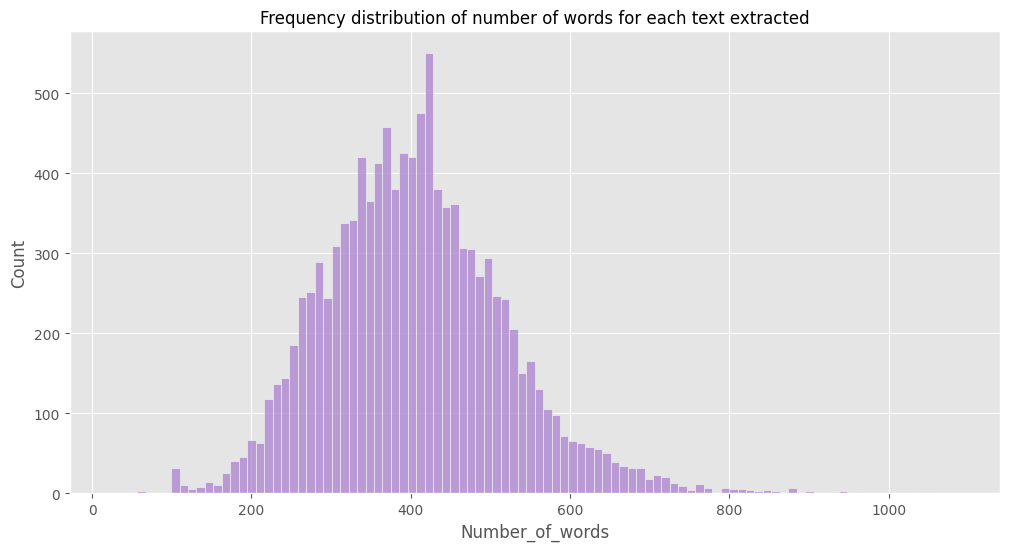

In [19]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.histplot(df['Number_of_words'], 
             kde = False, 
             color="#ab81d0", 
             bins = 100)
plt.title("Frequency distribution of number of words for each text extracted", size=12)

In [20]:
df["Number_of_words"].describe()

count    11137.000000
mean       405.950705
std        114.769356
min         25.000000
25%        328.000000
50%        401.000000
75%        474.000000
max       1086.000000
Name: Number_of_words, dtype: float64

## Text Pre-processing

### Stop words

In [22]:
punctuations = string.punctuation
stopwords = list(STOP_WORDS)
stopwords[:10]

['‘ll',
 'please',
 'myself',
 'someone',
 'quite',
 'take',
 'therefore',
 'there',
 'now',
 'therein']

In [22]:
# While doing the EDA words where found
custom_paper_words = ['doi', 'preprint', 'copyright', 'peer', 'reviewed',
                      'org', 'https', 'et', 'al', 'author', 'figure', 
                      'license', 'fig', 'fig.', 'research', 'project', 'use', 
                      'support', 'impact', 'student', 'award', 'broad', 'nsf', 
                      'new', 'stem', 'project', 'support', 'faculty', 'research', 
                      'engineer', 'program', 'problem', 'datum', 'broad', 'new', 
                      'physic', 'use', 'research', 'fault', 'campus', 'datum', 
                      'scientific', 'science', 'lt', 'br', 'gt', 'event', 'identify', 
                      'work', 'analysis', 'develope', 'method']

for w in custom_paper_words:
    if w not in stopwords:
        stopwords.append(w)

In [24]:
path_encore

'/opt/conda/lib/python3.11/site-packages/en_core_web_sm/__init__.py'

In [25]:
# Parser location in path_encore
nlp = spacy.load('/opt/conda/lib/python3.11/site-packages/en_core_web_sm/en_core_web_sm-2.3.1/', disable=["tagger", "ner"])
# parser nlp.max_length = 1000000

In [26]:
def cleaned_text(text):
    cleaned = re.sub("\n", " ", text)
    cleaned = cleaned.lower()
    cleaned = re.sub(r"[~.,%\/\\:;?_&+*=!-]", " ", cleaned) # match somre characters in the list
    cleaned = re.sub("[^a-z]", " ", cleaned) # match characters not present in list [a,b, ..., z]
    cleaned = re.sub("[0-9]", " ", cleaned)
    cleaned = cleaned.lstrip()
    cleaned = re.sub("\s{2,}", " ", cleaned) # case of more spaces
    return cleaned

In [27]:
tqdm.pandas()
df["cleaned_abstract"]= df["AbstractNarration"].progress_apply(lambda x: cleaned_text(str(x)))

100%|██████████| 11137/11137 [00:04<00:00, 2375.26it/s]


In [28]:
df["cleaned_abstract"] = df["cleaned_abstract"].progress_apply(lambda x: ' '.join([word for word in x.split() if len(word)>3]))

100%|██████████| 11137/11137 [00:00<00:00, 17589.38it/s]


In [29]:
def spacy_tokenizer(sentence, list_tokenized=False):
    tokens = nlp(sentence)
    tokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]
    tokens = [ word for word in tokens if word not in stopwords and word not in punctuations]
    if list_tokenized:
        return tokens
    else:
        tokens = " ".join([i for i in tokens])
        return tokens

In [30]:
df["processed_abstract"] = df["cleaned_abstract"].progress_apply(lambda x: spacy_tokenizer(x, list_tokenized=False))

100%|██████████| 11137/11137 [04:11<00:00, 44.34it/s]


In [40]:
#df["tokenized_abstract"] = df["processed_abstract"].progress_apply(lambda x: spacy_tokenizer(x, list_tokenized=True))

In [31]:
df[['cleaned_abstract', 'AbstractNarration']].sample()

,cleaned_abstract,AbstractNarration
4996,technical description research triangle nanotechnology network rtnn enables innovation commercialization promising nanotechnologies facilitates public education providing technical leadership open access comprehensive dynamic nanotechnology laboratories equipment research expertise three major research universities anchor rtnn north carolina state university duke university university north carolina chapel hill clustered near nation major nanoscience nano biotechnology regional economies rtnn identifies responds emerging nanotechnology infrastructure needs that will enable researchers address societal grand challenges next decade using facilities focal point convergence academic disciplines industries public private sector rtnn surmounts barriers accessing nanotechnology facilities implementing deploying innovative programs that continually assessed evaluated refined rtnn leads research social ethical implications nanotechnology sein including issues that reside intersection nanotechnology user facilities with employment economic development rtnn supports nanotechnology innovation ecosystem that spans grades community colleges universities industry translating program successes across nation rtnn serves leader development growth nanotechnology innovation ecosystems technical description rtnn integrates comprehensive shared user facilities complementary research programs three major research universities these resources used dramatically increase national impact state fabrication characterization facilities nanoscience nanotechnology specific emphasis engaging users from underserved groups including underrepresented groups stem well researchers typically access shared nanotechnology facilities such those from traditional disciplines rtnn technical capabilities span nanofabrication nano characterization traditional hard emerging soft materials core research expertise specialized technical capabilities rtnn span organic carbon based nanomaterials plant based nanomaterials textile nanofibers materials energy efficiency sustainability hybrid perovskite devices wide bandgap materials heterogeneous integration interfacial studies nanomaterials nanostructures flexible substrates nanofluidics systems nanostructures biology medicine environmental assessment nanoparticles drug delivery wearable electronics rtnn expands shared facilities usage creating assessing innovative programs disseminating these programs throughout nation these programs include modules nanotechnology maker course massive open online course making nanotechnology devices expansion program accelerate entry traditional users into working facilities community college internship program enhanced outreach grades rural communities leadership research community nanotechnology convergence this research community will bring together researchers from distinct disciplines address infrastructure barriers tackling major societal challenges this award reflects statutory mission been deemed worthy support through evaluation using foundation intellectual merit broader impacts review criteria,"Non-technical description: &lt;br/&gt;The Research Triangle Nanotechnology Network (RTNN) enables innovation and commercialization of new promising nanotechnologies and facilitates public education for the U.S. by providing technical leadership and open access to comprehensive and dynamic nanotechnology laboratories, equipment, and research expertise. Three major research universities anchor the RTNN (North Carolina State University, Duke University, and the University of North Carolina at Chapel Hill) and are clustered near one of the nation's major nanoscience and nano-biotechnology regional economies. The RTNN identifies and responds to emerging nanotechnology infrastructure needs that will enable researchers to address societal grand challenges of the next decade, using our facilities as a focal point for the convergence of academic disciplines, indus

In [32]:
lemmatizer = WordNetLemmatizer()

def worndnet_tagger(nltk_tag):
    if nltk_tag.startswith('N'):
        return wordnet.NOUN
    else:                    
        return None

def lemmatize_abstract(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))    
    wn_tagged = map(lambda x: (x[0], worndnet_tagger(x[1])), nltk_tagged)
    res_words = []
    for word, tag in wn_tagged:
        if tag is None:
            pass
        else:
            res_words.append(lemmatizer.lemmatize(word, tag))
    return " ".join(res_words)

In [33]:
sent1 = 'planktonic marine bacteria significantly impact global elemental cycling productivity water quality recent evidence shows that abundant diverse marine bacterioplankton require external vitamin precursors herein survive addition these nutrients stimulates bacterial production this suggests that favorable most marine bacteria rely supplied making dynamics environmentally relevant test case study nutrient exchanges within planktonic microbiome notably though links between extracellular availability composition function fitness marine bacteria poorly understood '

In [36]:
spacy_tokenizer(lemmatize_abstract(sent1))

'marine bacterium elemental cycle productivity water quality evidence bacterioplankton vitamin precursor addition nutrient production bacterium dynamic test case study nutrient exchange microbiome link availability composition function fitness marine bacterium'

In [37]:
df["lemmatize_abstract"] = df["processed_abstract"].progress_apply(lambda x: spacy_tokenizer(lemmatize_abstract(x)))

100%|██████████| 11137/11137 [06:16<00:00, 29.60it/s]


In [37]:
#df["lemmatize_abstract"] = df["lemmatized"].progress_apply(lambda x: ' '.join(x))

Plot the number of words per abstract after cleaning

Text(0.5, 1.0, 'Frequency distribution of the number of processed words for each text extracted')

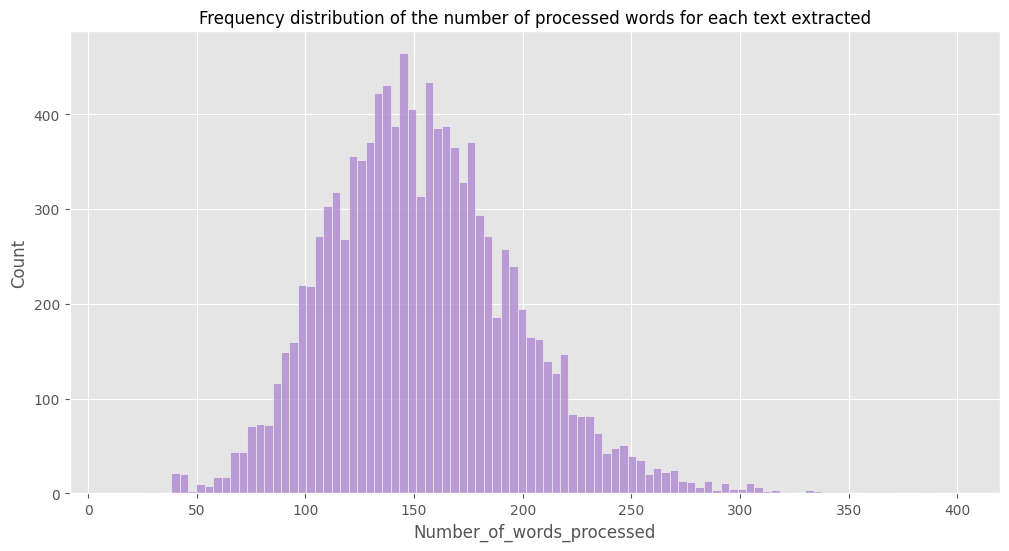

In [38]:
df['Number_of_words_processed'] = df['lemmatize_abstract'].apply(lambda x:len(str(x).split()))

plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.histplot(df['Number_of_words_processed'], 
             kde = False, 
             color="#ab81d0",
             bins = 100)
plt.title("Frequency distribution of the number of processed words for each text extracted", size=12)

## Mapper for Topic modelling

Given a dataset ${\cal D}$ of points $x \in \mathbb{R}^n$, the basic steps behind Mapper are as follows:

1. Let our text vector embeddings be denoted by ${\cal D}$. The first step is to project this set to a lower-dimensional space using a **filter function** $f: \mathbb{R}^n \to \mathbb{R}^m$. Common choices for the filter function include projection onto one or more axes via PCA or density-based methods.

We choose PCA because BERT embeddings are already a good representation of data, the only detail here is that the ambient space is $\mathbb{R}^{384}$. 

After PCA there's another projection step that is made: to use the Uniform Manifold Approximation and Projection or UMAP to project even further to 2-d space. This step is to help us reduce dimensionality for the clustring phase.

2. Construct an open cover of the filter values ${\cal U} = (U_i)_{i\in I}$, typically in the form of a set of overlapping intervals which have constant length. 

3. For each interval $U_i \in {\cal U}$ cluster the points in the preimage $f^{-1}(U_i)$ into sets $C_{i,1}, \ldots , C_{i,k_i}$. The choice of clustering algorithm can be any of ``scikit-learn``'s [clustering methods](https://scikit-learn.org/stable/modules/clustering.html).

4. Construct the topological graph whose vertices are the cluster sets $(C_{i,j})_{i\in I, j \in \{1,\ldots,k_i\}}$ and an edge exists between two nodes if they share points in common: $C_{i,j} \cap C_{k,l} \neq \emptyset$. This step is handled automatically by ``kepler-mapper`` library. And here's a detail that is quite relevant, the points in the intersection will be equivalent to text documents that belong to more than one cluster node in the Reeb graph.

> I will not deal with this issue: decide what topics are relevant for documents in the intersection. 



### Bert Embeddings

In [39]:
sent_embedding = SentenceTransformer('all-MiniLM-L6-v2')

In [40]:
def encaje_reng_p_reng(text):
    try:
        embedding = sent_embedding.encode(str(text))
        return embedding
    except Exception as e:
        print(e)
        print('Not possible to embed')
        return sent_embedding.encode(['nan'])

In [41]:
df_text = df[['AwardID', 'lemmatize_abstract']]
df_text.columns = ['AwardID','lemmatize_abstract']
df_text.set_index('AwardID', inplace=True)

In [42]:
df_text['abs_embedding'] = df_text['lemmatize_abstract'].progress_apply(lambda x: encaje_reng_p_reng(x))

100%|██████████| 11137/11137 [09:08<00:00, 20.32it/s]
/tmp/ipykernel_174/4110382624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['abs_embedding'] = df_text['lemmatize_abstract'].progress_apply(lambda x: encaje_reng_p_reng(x))


In [43]:
len(list(df_text['abs_embedding'])[0])

384

In [44]:
df_text.sample()

,lemmatize_abstract,abs_embedding
AwardID,,
2019131,research instrumentation grant support development deposition tool beam epitaxy system fabrication nanoscale structure application quantum engineer emerge press test nanoscale structure information process investigation question quantum information science development quantum sensor quantum compute quantum network technology material synthesis engineer development researcher pursue design base probe technology deposition tool combine advance synthesis step instrument impact facilitate development quantum technology tool quantum research engineer community university chicago promote education outreach graduate school level program engage community chicago area investigator machine usage quantum research community university train quantum scientist team material science quantum sense quantum compute quantum information goal develope miniaturize system state deposition tool scale film nanofabrication photo electron beam lithography use step structure device support grant investigator scale deposition nanometer customize probe nano tunnel microscopy system tool develope dedicate laboratory space university microscopy tool characterize structure fabricate miniaturize system research numb area superconducting quantum device base superconductor deposition dope earth host body bite quantum sensor compose earth island nitrogen vacancy center field define development aim investigation quantum phenomenon quantum technology development award mission deem support evaluation use foundation merit impact review criterium,"[-0.012081738, -0.03340512, -0.014260976, 0.013980751, -0.023640428, -0.04939275, -0.04386411, 0.006105156, -0.09516567, 0.047902286, -0.024194434, -0.10018768, -0.0171655, 0.020004164, 0.013953679, 0.040324695, 0.05705641, 0.014950313, 0.022957241, -0.02119727, 0.05090808, -0.0017899922, 0.02763673, -0.036242448, -0.06561783, 0.014727804, -0.034616716, -0.024418551, -0.026885422, -0.05677851, -0.04176367, 0.18432172, -0.029315734, 0.015474082, 0.051889326, 0.041528303, -0.03874317, 0.06331576, 0.030140024, -0.06561578, -0.07746426, -0.0083440645, -0.022767346, 0.0020117653, 0.044338774, -0.011992332, -0.0018943388, -0.053036507, 0.05081222, -0.093020946, -0.022555374, -0.016109778, 0.018830422, 0.011306516, -0.0019658857, -0.03315807, 0.005173597, -0.022413563, -0.023336949, -0.034594335, -0.013854493, -0.054898355, -0.06558487, 0.017917246, 0.045608114, 0.025632614, -0.064472444, 0.041273516, 0.013795039, 0.00444192, -0.013454917, -0.0034191173, -0.05006927, 0.13558789, 0.042748075, 0.010064161, 0.089361206, 0.04946542, 0.04932798, -0.065295964, 0.0018503683, -0.006397645, 0.044274326, 0.019481545, -0.024018316, 0.065398246, -0.039823424, 0.054258104, -0.024392605, -0.1026537, -0.053274624, -0.048681088, -0.015818564, -0.031949937, -0.009175102, -0.038376722, 0.0066783167, -0.036615837, 0.019612746, -0.045071237, ...]"


### TDA: Mapper graphs

In [45]:
# Kepler Mapper
import kmapper as km
from kmapper import Cover
from kmapper.jupyter import display

# Sklearn clustering and processors
from sklearn import cluster
from sklearn import manifold
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import Isomap
from sklearn.preprocessing import MinMaxScaler

# UMAP learn library
import umap

2024-03-01 03:20:17.788753: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-01 03:20:18.147222: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-01 03:20:19.802847: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [46]:
emb_abstracts = df_text.abs_embedding.apply(pd.Series)

emb_abstracts.index = df_text.index

In [47]:
pca = PCA(n_components=50)
pca.fit(emb_abstracts)
print(pca.explained_variance_ratio_)

[0.08098357 0.06810673 0.05671994 0.04933035 0.04369039 0.02851029
 0.02794548 0.02203614 0.0200299  0.01931351 0.0166685  0.01513548
 0.01412116 0.01323848 0.01216215 0.01172068 0.01087391 0.01042255
 0.01020932 0.00984218 0.00928355 0.00887175 0.00874683 0.00830647
 0.00788447 0.00757292 0.00739918 0.00728365 0.00692701 0.00678228
 0.00656362 0.00634043 0.00610944 0.00600164 0.00587084 0.00561871
 0.00548523 0.0053509  0.00522905 0.00510297 0.00498093 0.00476838
 0.00473203 0.00459122 0.00442827 0.00434388 0.00418728 0.00407149
 0.00401063 0.0038202 ]


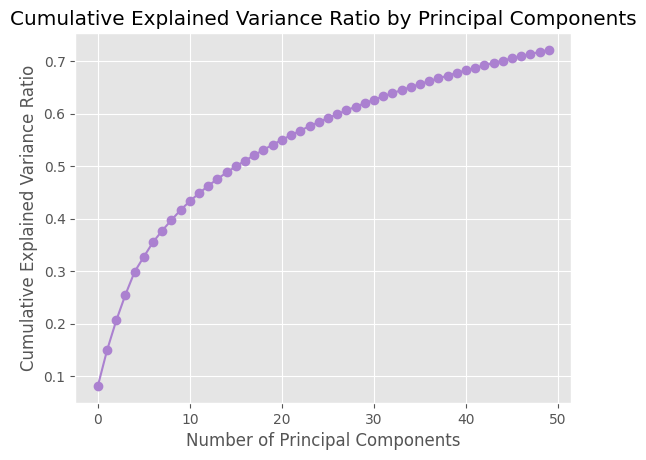

In [48]:
# Plot explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_variance_ratio, marker='o', color='#ab81d0')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.show()

In [49]:
mapper = km.KeplerMapper(verbose=1)

projected_X = mapper.fit_transform(emb_abstracts, 
                                   projection=[PCA(n_components=50,random_state= 2024),
                                               #TruncatedSVD(n_components=100, random_state=2024),
                                               Isomap(n_components=2,n_jobs=-1)
                                               #umap.UMAP(n_components=2,random_state=2024)
                                              ])

print("Projection shape: ",projected_X.shape)

KeplerMapper(verbose=1)
..Composing projection pipeline of length 2:
	Projections: PCA(n_components=50, random_state=2024)
		Isomap(n_jobs=-1)
	Distance matrices: False
False
	Scalers: MinMaxScaler()
MinMaxScaler()
..Projecting on data shaped (11137, 384)

..Projecting data using: 
	PCA(n_components=50, random_state=2024)


..Scaling with: MinMaxScaler()

..Projecting on data shaped (11137, 50)

..Projecting data using: 
	Isomap(n_jobs=-1)


..Scaling with: MinMaxScaler()

Projection shape:  (11137, 2)


In [50]:

# cluster data using DBSCAN
G = mapper.map(projected_X, 
               X=None, 
               nerve=km.GraphNerve(min_intersection=2),
               cover=Cover(perc_overlap=0.13),
               clusterer=cluster.AgglomerativeClustering(n_clusters=2, 
                                                         #linkage="ward",
                                                         linkage = 'complete', 
                                                         metric="cosine"
                                                        )
               ) #Created 176 edges and 60 nodes

Mapping on data shaped (11137, 2) using lens shaped (11137, 2)

Creating 100 hypercubes.

Created 317 edges and 168 nodes in 0:00:00.232342.


In [170]:
#df_text.head()

In [53]:
# visualize graph
q = mapper.visualize(G, 
                path_html="mapper_example_nsf"+".html",
                title='Mapper Graph Clusters',
                #custom_tooltips = df_text.index.to_numpy(),
                #color_values = df_text.index.to_numpy(),
                #color_function_name = 'Award id',
                #node_color_function = np.array(['average', 'std', 'sum', 'max', 'min'])
                )
km.jupyter.display("mapper_example_nsf"+".html")

Wrote visualization to: mapper_example_nsf.html


/opt/conda/lib/python3.11/site-packages/IPython/core/display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [60]:
G['nodes']['cube25_cluster0']

[5410]

In [61]:
list(mapper.data_from_cluster_id('cube25_cluster0', G, df.index)) #(11137, 28)

[5410]

### Topics from a cluster node

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
'cube25_cluster0'.replace('_cluster','').replace('cube','')

'250'

In [63]:
# clusters are listed in:
list(dict(G['nodes']).keys())[:2]

['cube2_cluster0', 'cube2_cluster1']

In [73]:
# Cluster abstracts indexes

list_cube = list(mapper.data_from_cluster_id('cube65_cluster1', G, df.index))

In [74]:
list_cube[:3]

[7536, 7701]

In [75]:
test_list = [7701]

In [76]:
len(list(df.loc[df.index.isin(test_list),'lemmatize_abstract']))

1

In [77]:
abstracts_cluster_0 = list(df.loc[df.index.isin(list_cube),'lemmatize_abstract'])
print(len(abstracts_cluster_0))
abstracts_cluster_0[0]

2


'optimization problem area science engineer problem chemistry material science optimization cost function constraint optimization method tool study problem method tackle problem sort configuration space need algorithm protocol execute quantum computer promise approach solve problem quantum method focus attention context project seek novel approach solve optimization problem capability state fast convergence quantum iteration iteration develope protocol reach solution problem handle problem capability bottleneck quantum optimization protocol qaoa quantum iteration converge project quantum iteration approach advance minimization tool result quantum information theory estimation quantity precise control estimation error base minimization state approach optimization base datum quantum iteration resource turn enhance ability optimization problem device project fund division chemistry award mission deem support evaluation use foundation merit impact review criterium'

In [78]:
vec = TfidfVectorizer(analyzer="word",
                      strip_accents="unicode",
                      stop_words="english",
                      ngram_range=(1,3),
                      max_df=0.90,
                      min_df=0.05)

In [79]:
interpretable_inverse_X = vec.fit_transform(abstracts_cluster_0).toarray()
interpretable_inverse_X_names = vec.get_feature_names_out()

print("SHAPE", interpretable_inverse_X.shape)
print('feature names size', len(interpretable_inverse_X_names))
print("FEATURE NAMES SAMPLE", interpretable_inverse_X_names[:24])

SHAPE (2, 548)
feature names size 548
FEATURE NAMES SAMPLE ['ability' 'ability optimization' 'ability optimization problem' 'advance'
 'advance minimization' 'advance minimization tool' 'advantage'
 'advantage computer' 'advantage computer task' 'algorithm create'
 'algorithm create way' 'algorithm game' 'algorithm game goal'
 'algorithm project' 'algorithm project version' 'algorithm protocol'
 'algorithm protocol execute' 'answer' 'answer use'
 'answer use supercomputer' 'application' 'application base'
 'application base term' 'application quantum']


In [80]:
feature_array = np.array(interpretable_inverse_X_names)
tfidf_sorting = np.argsort(interpretable_inverse_X).flatten()[::-1]

In [81]:
n = 30
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['machine', 'circuit', 'quantum circuit', 'simulation', 'way',
       'quantum algorithm', 'compute', 'learn', 'learn quantum',
       'machine learn', 'machine learn quantum', 'measurement', 'regard',
       'molecule', 'require', 'computation', 'application', 'professor',
       'development', 'evangelista', 'eigensolver method approach',
       'emory', 'goal solution quantum', 'instance', 'impact winter',
       'impact winter school', 'information science quantum',
       'emory university', 'implement', 'electron'], dtype=object)

In [82]:
from thefuzz import fuzz
from thefuzz import process

In [83]:
fuzz.partial_token_sort_ratio("fellowship massachusetts institute", "massachusetts")

100

In [84]:
temp_top = pd.DataFrame(top_n)
temp_top.columns = ['top_n']
temp_top.head(10)

,top_n
0,machine
1,circuit
2,quantum circuit
3,simulation
4,way
5,quantum algorithm
6,compute
7,learn
8,learn quantum
9,machine learn


In [85]:
def replace_duplicates(df, column_name='top_n', threshold=90):
    processed = []
    duplicates = set()
    first_occurrence = {}
    
    for i, row in df.iterrows():
        row_text = row[column_name]
        
        if i not in duplicates:
            processed.append(row)
            first_occurrence[row_text] = i
            
            for j, other_row in df.iterrows():
                if i != j and j not in duplicates:
                    other_text = other_row[column_name]
                    score = fuzz.token_set_ratio(row_text, other_text)
                    
                    if score >= threshold:
                        duplicates.add(j)
                        first_occurrence[other_text] = i
                        
    return df.iloc[list(first_occurrence.values())]

In [86]:
replace_duplicates(temp_top, column_name='top_n', threshold=80).drop_duplicates()

,top_n
0,machine
1,circuit
3,simulation
4,way
5,quantum algorithm
6,compute
7,learn
11,measurement
12,regard
13,molecule


What happens if cluser has only 1 member?

> Extrac keywords is the best approach

In [87]:
from keybert import KeyBERT

kw_model = KeyBERT()

In [89]:
keywords = kw_model.extract_keywords(abstracts_cluster_0[0], 
                                       keyphrase_ngram_range=(1, 3), 
                                       use_mmr=True, 
                                       diversity=0.7)

In [90]:
[keyw[0] for keyw in keywords]

['quantum optimization',
 'chemistry material science',
 'configuration space need',
 'support evaluation use',
 'datum']

With this workflow we can extract topics by cluster node from the Mapper graph.

In [91]:
n = 40

vec = TfidfVectorizer(analyzer="word",
                      strip_accents="unicode",
                      stop_words="english",
                      ngram_range=(1,4),
                      max_df=0.92,
                      min_df=0.1)

df['cluster'] = '-1'
df['Topics'] = 'No topic'
df['Topics'] = df['Topics'].astype('object')

In [92]:
for node_cluster in list(dict(G['nodes']).keys()):  
    try: 
        cube_list = list(mapper.data_from_cluster_id(node_cluster, G, df.index))
        #print(cube_list[0])
        #print(node_cluster)
        abstracts_in_cluster = list(df.loc[df.index.isin(cube_list),'lemmatize_abstract'])
        #print(len(abstracts_in_cluster))
        #print(abstracts_in_cluster[2:3])
        if len(abstracts_in_cluster)>1:
            interpretable_inverse_X = vec.fit_transform(abstracts_in_cluster).toarray()
            #print("SHAPE", interpretable_inverse_X.shape)
            feature_array = np.array(vec.get_feature_names_out())
            tfidf_sorting = np.argsort(interpretable_inverse_X).flatten()[::-1]
            temp_top = pd.DataFrame(feature_array[tfidf_sorting][:n])
            temp_top.columns = ['top_n']
            temp_top = replace_duplicates(temp_top, column_name='top_n', threshold=80).drop_duplicates().reset_index(drop=True)
            df.loc[df.index.isin(cube_list),'cluster'] = node_cluster.replace('_cluster','').replace('cube','').strip()
            #print(node_cluster.replace('_cluster','').replace('cube',''))
            for ind in cube_list:
                #df.loc[df.index.isin([ind]),'Topics'] = list(temp_top['top_n'][:10])
                df.loc[df.index.isin([ind]),'Topics'] = df.loc[df.index.isin([ind]),'Topics'].apply(lambda x: list(temp_top['top_n'][:10]))
        else:
            #print(len(abstracts_in_cluster))
            #print(cube_list)
            keywords = kw_model.extract_keywords(abstracts_in_cluster[0], 
                                       keyphrase_ngram_range=(1, 2), 
                                       use_mmr=True, 
                                       diversity=0.7)
            print(cube_list, node_cluster)
            df.loc[df.index.isin(cube_list), 'cluster'] = node_cluster.replace('_cluster','').replace('cube','').strip()
            print('cluster:{}, indexes: {}'.format(node_cluster.replace('_cluster','').replace('cube',''), cube_list))
            for ind in cube_list:
                #df.loc[df.index.isin([ind]),'Topics'] = list(temp_top['top_n'][:10])
                df.loc[df.index.isin([ind]),'Topics'] = df.loc[df.index.isin([ind]),'Topics'].apply(lambda x: [keyw[0] for keyw in keywords])
    except Exception as e:
        print(e)
        print('Cluster with error: {}, possibly no topics'.format(node_cluster))
        continue

[5569] cube8_cluster1
cluster:81, indexes: [5569]
[5410] cube25_cluster0
cluster:250, indexes: [5410]
[1532] cube25_cluster1
cluster:251, indexes: [1532]
[6895] cube74_cluster0
cluster:740, indexes: [6895]
[1127] cube74_cluster1
cluster:741, indexes: [1127]
[4570] cube83_cluster0
cluster:830, indexes: [4570]
[1412] cube83_cluster1
cluster:831, indexes: [1412]
[859] cube89_cluster0
cluster:890, indexes: [859]
[725] cube89_cluster1
cluster:891, indexes: [725]
list index out of range
Cluster with error: cube7_cluster1, possibly no topics
list index out of range
Cluster with error: cube0_cluster1, possibly no topics
list index out of range
Cluster with error: cube0_cluster0, possibly no topics


In [93]:
df.columns

Index(['AwardTitle', 'AGENCY', 'AwardEffectiveDate', 'AwardExpirationDate',
       'AwardTotalIntnAmount', 'AwardAmount', 'AwardInstrument',
       'Organization', 'ProgramOfficer', 'AbstractNarration',
       'MinAmdLetterDate', 'MaxAmdLetterDate', 'ARRAAmount', 'TRAN_TYPE',
       'CFDA_NUM', 'NSF_PAR_USE_FLAG', 'FUND_AGCY_CODE', 'AWDG_AGCY_CODE',
       'AwardID', 'Investigator', 'Institution', 'Performance_Institution',
       'ProgramElement', 'ProgramReference', 'Appropriation', 'Fund',
       'FUND_OBLG', 'POR', 'Number_of_words', 'cleaned_abstract',
       'processed_abstract', 'lemmatize_abstract', 'Number_of_words_processed',
       'cluster', 'Topics'],
      dtype='object')

In [94]:
df[df['cluster']=='80'][['AbstractNarration', 'cluster', 'Topics', 'AwardID']].sample()

,AbstractNarration,cluster,Topics,AwardID
9838,"This project examines the effects of COVID-19 exposure during pregnancy on birth outcomes, over time, and across different groups defined by different sources of disadvantage. The COVID-19 pandemic is a large shock likely to affect infant health through multiple pathways including maternal infection, stress and anxiety, economic hardship, and access to prenatal care. Because these factors differ across groups in the United States, the impact of COVID-19 on birth outcomes will likely be stronger among groups with fewer advantages and certain demographic groups, exacerbating differences in the United States. These effects are critical to understand because birth outcomes predict health and socioeconomic attainment throughout the life course. &lt;br/&gt;&lt;br/&gt;This study relies on causal inference techniques exploiting variation in infection rates across time and place to capture the consequences of the pandemic on differences in birth outcomes, in particular intrauterine growth restriction, a key predictor of early-life cognition, education, and ultimately earnings. Birth records obtained at the state level with early release are used to provide the earliest possible evidence. Research focuses on six states that provide large and diverse samples across areas where the pandemic has unfolded with significant variation. Time-varying data on COVID incidence and mortality, and local official responses are linked to these data.&lt;br/&gt;&lt;br/&gt;This award reflects NSF's statutory mission and has been deemed worthy of support through evaluation using the Foundation's intellectual merit and broader impacts review criteria.",80,"[group, state, birth, effect, infection, difference, life, health, variation, growth restriction predictor]",2049300


In [95]:
df.cluster.value_counts().head(10)

200    464
300    384
210    364
201    298
211    288
291    273
580    256
310    254
390    241
220    230
Name: cluster, dtype: int64

In [96]:
df.cluster = df.cluster.apply(lambda x: int(x))

In [97]:
df.Topics.value_counts().head(20)

[community, partner, industry, college, research, school, faculty, educator, experience, infrastructure]       464
[center, industry, generation, workforce, nation, advance, community, education, resource, technology]         384
[industry, technology, education, practice, nation, teach, advance, meet, world, workforce]                    364
[student, access, course, workforce, train, tool, college, result, technology, work]                           298
[program, workforce, industry, technology, train, infrastructure, college, address, project, team]             288
[industry, student, partner, opportunity, education, project, increase, college, workforce, prepare]           273
[water, tool, soil, plant, estimate, flow, source, time, leverage, conduct]                                    256
[education, community, research, program, collaboration, activity, experience, addition, career, component]    254
[engineer, school, design, site, student, service, diversity, practice, science,

In [100]:
df.Topics.isnull().sum()

0

In [101]:
# visualize graph
q = mapper.visualize(G, 
                path_html="mapper_example_nsf"+".html",
                title='Mapper Graph Clusters',
                custom_tooltips = df.Topics.to_numpy(),
                color_values = df.cluster.to_numpy(),
                color_function_name = 'Award id',
                node_color_function = np.array(['average'])
                )
km.jupyter.display("mapper_example_nsf"+".html")

Wrote visualization to: mapper_example_nsf.html


/opt/conda/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.11/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/opt/conda/lib/python3.11/site-packages/kmapper/visuals.py:344: RuntimeWarning: invalid value encountered in long_scalars
  height = np.floor(((bar / max_bucket_value) * 100) + 0.5)
/opt/conda/lib/python3.11/site-packages/kmapper/visuals.py:345: RuntimeWarning: invalid value encountered in long_scalars
  perc = round((bar / sum_bucket_value) * 100.0, 1)
/opt/conda/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/opt/conda/lib/python3.11/site-packages/IPython/core/display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### Funding Oppotunities

Here we use the final dataset and find the funding related to each topic group.

In [102]:
df['Topics_as_text'] = df.Topics.apply(lambda x: ' '.join(x))

In [103]:
df['Topics_as_text'][0]

'plant agriculture environment production food cell control specie land innovation'

In [104]:
df['AwardAmount'].describe()

count    1.113700e+04
mean     5.321633e+05
std      1.303048e+06
min      0.000000e+00
25%      1.815840e+05
50%      3.000000e+05
75%      5.000000e+05
max      2.564000e+07
Name: AwardAmount, dtype: float64

In [105]:
def amount_converter(x):
    '''
    amount will be in millions in usd currency
    '''
    try:
        return x/1000000
    except Exception as e:
        print(e)
        return 0

In [106]:
df['AwardAmountMM'] = df['AwardAmount'].apply(lambda x: amount_converter(x) )

In [107]:
df.groupby('Topics_as_text')['AwardAmountMM'].mean().sort_values(ascending=False).reset_index().head(15)

,Topics_as_text,AwardAmountMM
0,laser field time sense measure goal project resolution chip source level,1.526187
1,user online privacy research gain security measure role develope technique,1.476422
2,phasis matt condense connection quantum theory development property class aim,1.450366
3,parameter property train material method measurement simulation knowledge density example,1.249590
4,equation solution problem condition study investigate existence project case demonstrate,1.118414
5,effect medium rate wave question structure scale equation project source,1.116537
6,production phytoplankton study advance cycle base tag component lipidomics observation,1.018643
7,method equation schrodinger operator problem quasiperiodic approach result bourgain estimate,0.942306
8,theory process space quantum algebra quark mathematics application technique field,0.936789
9,image electron network measurement size learn resolution stem model machine,0.933683


In [109]:
def Conclusions(df):
    resulting_dict = {}
    resulting_dict['Cluster_members'] = df['AwardID'].count()
    resulting_dict['Average_Fund'] = df['AwardAmountMM'].mean()
    resulting_dict['Total_fund'] = df['AwardAmountMM'].sum()
    return pd.Series(resulting_dict, index=['Cluster_members', 'Average_Fund', 'Total_fund'])

df.groupby('Topics_as_text').apply(Conclusions).sort_values('Average_Fund', ascending=False).head(15)

,Cluster_members,Average_Fund,Total_fund
Topics_as_text,,,
laser field time sense measure goal project resolution chip source level,38.0,1.526187,57.995092
user online privacy research gain security measure role develope technique,22.0,1.476422,32.481289
phasis matt condense connection quantum theory development property class aim,27.0,1.450366,39.159893
parameter property train material method measurement simulation knowledge density example,49.0,1.249590,61.229889
equation solution problem condition study investigate existence project case demonstrate,51.0,1.118414,57.039110
effect medium rate wave question structure scale equation project source,33.0,1.116537,36.845713
production phytoplankton study advance cycle base tag component lipidomics observation,1.0,1.018643,1.018643
method equation schrodinger operator problem quasiperiodic approach result bourgain estimate,6.0,0.942306,5.653839
theory process space quantum algebra quark mathematics application technique field,61.0,0.936789,57.144138


## References

1. Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks [link](https://arxiv.org/abs/1908.10084)
2. UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction [link](https://arxiv.org/abs/1802.03426)
3. Topological Methods for the Analysis of High Dimensional
Data Sets and 3D Object Recognition [link](https://research.math.osu.edu/tgda/mapperPBG.pdf)
4. Sentence Transformers: BERT embeddings repository [link](https://www.sbert.net/)
5. KeyBERT repository: [link](https://github.com/MaartenGr/keyBERT)
6. Keppler Mapper repository: [link](https://kepler-mapper.scikit-tda.org/en/latest/theory.html)
7. UMAP repository and documentation: [link](https://umap-learn.readthedocs.io/en/latest/how_umap_works.html)
8. Sklearn Agglomerative Clustering: [link](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)